In [1]:
#import packages
import pandas as pd
import json
from pandas.io.json import json_normalize

In [2]:
#load as Pandas dataframe
df = pd.read_json('data/world_bank_projects.json')
df.head()

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{'$oid': '52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,JB,IBRD,Active,N,"{'Percent': 50, 'Name': 'Participation and civ...","[{'code': '57', 'name': 'Participation and civ...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,{'$oid': '52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,"FH,YW,YZ",IBRD,Active,N,"{'Percent': 30, 'Name': 'Export development an...","[{'code': '45', 'name': 'Export development an...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...


In [6]:
#Find 10 countries with most projects and store in top_countries
count_countries = df['countryshortname'].value_counts().head(10)

In [7]:
#import package
import matplotlib.pyplot as plt

Text(0.5,1,'Top 10 Countries with most projects')

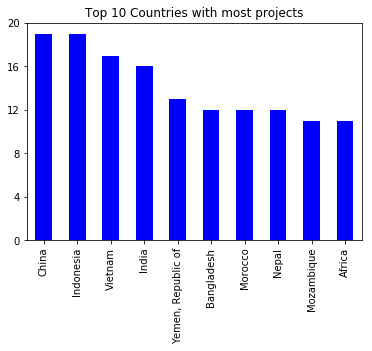

In [29]:
#answer to 1
count_countries.plot(kind='bar', color='blue')
plt.yticks((0,4,8,12,16,20))
plt.title('Top 10 Countries with most projects')

In [3]:
#load file to json format
json_data = json.load((open('data/world_bank_projects.json', 'r')))

In [38]:
#normalize 'mjtheme_namecode' column and store to df_theme
df_theme = json_normalize(json_data, 'mjtheme_namecode')
df_theme.head(10)

,code,name
0,8,Human development
1,11,
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
5,2,Public sector governance
6,11,Environment and natural resources management
7,6,Social protection and risk management
8,7,Social dev/gender/inclusion
9,7,Social dev/gender/inclusion


In [30]:
#open dictionary for loop
name_dict = {}

#Loop over df to find missing name
#answer to 3
for index, row in df_theme.iterrows():
    if row[0] not in name_dict.keys() and row[1] is not '':
        name_dict[row[0]] = row[1]

In [32]:
#check dictionary to match code:name pairs
print(name_dict)

{'8': 'Human development', '1': 'Economic management', '6': 'Social protection and risk management', '5': 'Trade and integration', '2': 'Public sector governance', '11': 'Environment and natural resources management', '7': 'Social dev/gender/inclusion', '4': 'Financial and private sector development', '10': 'Rural development', '9': 'Urban development', '3': 'Rule of law'}


In [34]:
#use dictionary to map code column to name
df_theme['name'] = df_theme['code'].map(name_dict)

In [36]:
#answer to 3
print(df_theme.head())

  code                                          name
0    8                             Human development
1   11  Environment and natural resources management
2    1                           Economic management
3    6         Social protection and risk management
4    5                         Trade and integration


In [27]:
#find top 10 themes
top_theme = df_theme['name'].value_counts().head(10)

Text(0.5,1,'Top 10 Major Project Themes')

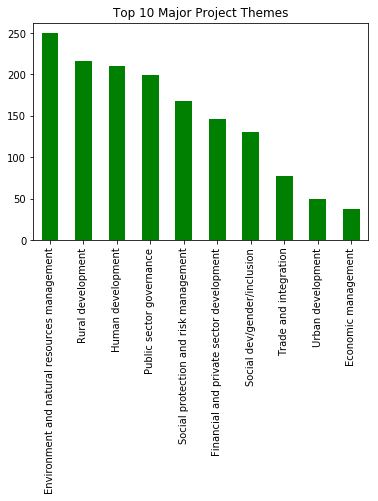

In [30]:
#plot top 10 themes
#answer to 2
top_theme.plot(kind='bar', color='green')
plt.title('Top 10 Major Project Themes')